In [1]:
import pandas as pd
import nltk
import re
import sklearn.feature_extraction.text as text
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyvi import ViTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('G:/My Drive/PBL6/dataFakeNewsKhoi8406-1k.csv')
data2 = pd.read_csv('G:/My Drive/PBL6/dataRealNew1k.csv')
df = pd.concat([data, data2], ignore_index=True)
df

,Title,URL,Content,Label
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0
...,...,...,...,...
2122,"Phí đăng ký, cấp biển số xe bán tải tăng từ 50...",https://thanhnien.vn/phi-dang-ky-cap-bien-so-x...,"Sau một thời gian được đưa ra lấy ý kiến, mới ...",0.0
2123,"Những trường hợp nào được đăng ký xe tạm thời,...",https://thanhnien.vn/nhung-truong-hop-nao-duoc...,"Cùng với những quy định mới về việc cấp, thu h...",0.0
2124,Honda HR-V độ phong cách siêu xe Lamborghini U...,https://thanhnien.vn/honda-hr-v-do-phong-cach-...,Một cửa hàng phụ kiện ô tô tại TP.HCM đã nâng ...,0.0
2125,Người chơi xe tại Việt Nam chi hàng trăm triệu...,https://thanhnien.vn/nguoi-choi-xe-tai-viet-na...,"Trước đây, để thể hiện ""chất chơi"" không ít ng...",0.0


([<matplotlib.patches.Wedge at 0x168ed919e70>,
 [Text(-1.198350796324464, -0.06289172400661007, 'Fake'),
  Text(1.1983507904361104, 0.06289183620430847, 'True')],
 [Text(-0.6990379645226038, -0.036686839003855866, '51.7%'),
  Text(0.699037961087731, 0.03668690445251327, '48.3%')])

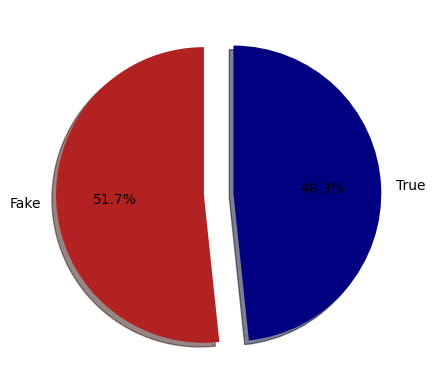

In [3]:
label_size = [df['Label'].sum(),len(df['Label'])-df['Label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

Xử lý dữ liệu trống

In [4]:
df.isnull().sum()

Title       1
URL         1
Content    48
Label       1
dtype: int64

In [5]:
df = df.dropna()
df = df.drop(data[data['Content']=='* · '].index)
df

,Title,URL,Content,Label
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0
...,...,...,...,...
2122,"Phí đăng ký, cấp biển số xe bán tải tăng từ 50...",https://thanhnien.vn/phi-dang-ky-cap-bien-so-x...,"Sau một thời gian được đưa ra lấy ý kiến, mới ...",0.0
2123,"Những trường hợp nào được đăng ký xe tạm thời,...",https://thanhnien.vn/nhung-truong-hop-nao-duoc...,"Cùng với những quy định mới về việc cấp, thu h...",0.0
2124,Honda HR-V độ phong cách siêu xe Lamborghini U...,https://thanhnien.vn/honda-hr-v-do-phong-cach-...,Một cửa hàng phụ kiện ô tô tại TP.HCM đã nâng ...,0.0
2125,Người chơi xe tại Việt Nam chi hàng trăm triệu...,https://thanhnien.vn/nguoi-choi-xe-tai-viet-na...,"Trước đây, để thể hiện ""chất chơi"" không ít ng...",0.0


([<matplotlib.patches.Wedge at 0x168ed9b3160>,
 [Text(-1.199965181208406, -0.009141328540075691, 'Fake'),
  Text(1.199965181208406, 0.009141328540075544, 'True')],
 [Text(-0.6999796890382367, -0.005332441648377486, '50.2%'),
  Text(0.6999796890382367, 0.0053324416483774, '49.8%')])

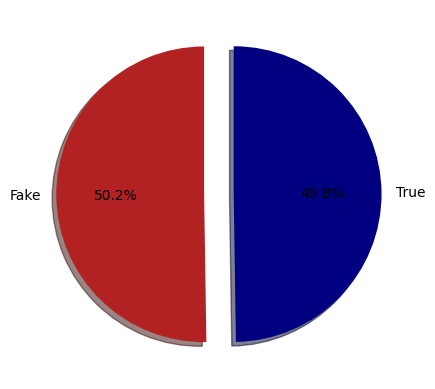

In [6]:
label_size = [df['Label'].sum(),len(df['Label'])-df['Label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

Đọc file stop_word 

In [5]:
df_stop_words = pd.read_csv('D:/Data/DATA PBL6/stop_word/vietnamese.txt')
with open('D:/Data/DATA PBL6/stop_word/vietnamese.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

Các hàm làm sạch dữ liệu 

In [6]:
# xóa số
def delete_number(text):
    return re.sub(r'\d+', ' ', text)
# chuyển chữ hoa thành thường
def lowercase(text):
    return text.lower()
# xóa dấu câu
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)
# Xóa ký tự đặc biệt
def remove_special_characters(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()
#Xóa từ dừng
def remove_stopwords(text, stop_word):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_word]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
def preprocess(text, stopwords):
    text = delete_number(text)
    text = lowercase(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text, stopwords)
    return text
def preprocess_nonstopword(text):
    text = delete_number(text)
    text = lowercase(text)
    text = remove_punctuation(text)
    text = remove_special_characters(text)
    return text

Tiền xử lý không tách từ dừng 

In [7]:
df['preprocess'] = df.apply(lambda row: preprocess_nonstopword(row['Content']), axis=1)

In [8]:
def tokenize_text(text):
    return ViTokenizer.tokenize(text)

In [9]:
# Áp dụng hàm tokenize_text cho cột "Content"
df['Segmented_Content'] = df['preprocess'].apply(tokenize_text)

In [10]:
df.head(5)

,Title,URL,Content,Label,preprocess,Segmented_Content
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0,kê tư khi lên câm quyên vao năm tâp cân binh đ...,kê tư khi lên câm quyên vao năm tâp cân binh đ...
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0,iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0,vào ngày tháng để kỷ niệm năm ngày thành lập n...,vào ngày_tháng để kỷ_niệm năm ngày thành_lập n...
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0,người phát ngôn bộ ngoại giao trung quốc cảnh ...,người phát_ngôn bộ ngoại_giao trung quốc cảnh ...
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0,vào ngày thứ tư tháng năm bộ nội an đã công bố...,vào ngày thứ tư tháng năm bộ nội an đã công_bố...


In [11]:
def count_token(text):
    word = tokenize_text(str(text))
    return len(word)
def tokenizer(text):
    return word_tokenize(text)
def top_count(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x:str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(50))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    return temp

In [12]:
df['Tokenize_Content'] = df['Segmented_Content'].apply(tokenizer)

In [13]:
df.head(5)

,Title,URL,Content,Label,preprocess,Segmented_Content,Tokenize_Content
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0,kê tư khi lên câm quyên vao năm tâp cân binh đ...,kê tư khi lên câm quyên vao năm tâp cân binh đ...,"[kê, tư, khi, lên, câm, quyên, vao, năm, tâp, ..."
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0,iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,"[iran, chủ_mưu, vụ, tấn_công, vào, mấy, nhà_má..."
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0,vào ngày tháng để kỷ niệm năm ngày thành lập n...,vào ngày_tháng để kỷ_niệm năm ngày thành_lập n...,"[vào, ngày_tháng, để, kỷ_niệm, năm, ngày, thàn..."
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0,người phát ngôn bộ ngoại giao trung quốc cảnh ...,người phát_ngôn bộ ngoại_giao trung quốc cảnh ...,"[người, phát_ngôn, bộ, ngoại_giao, trung, quốc..."
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0,vào ngày thứ tư tháng năm bộ nội an đã công bố...,vào ngày thứ tư tháng năm bộ nội an đã công_bố...,"[vào, ngày, thứ, tư, tháng, năm, bộ, nội, an, ..."


In [14]:
word_count = df['Segmented_Content'].apply(count_token)
top_count = top_count("Segmented_Content")
top_count.style.background_gradient(cmap='Blues')

,Common_words,count
0,của,22304
1,và,22204
2,là,17400
3,các,15540
4,trong,14258
5,có,13776
6,không,13119
7,cho,12667
8,một,11354
9,đã,11086


Số token trong bài báo 

Text(0.5, 0, 'Seaborn Strip Plot Count without stop words')

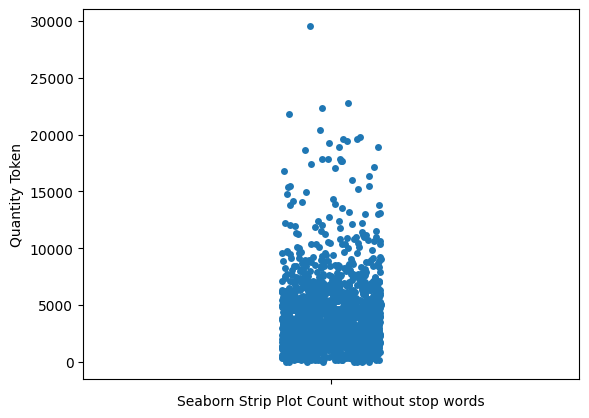

In [15]:
df['Word_count'] = word_count
sns.stripplot(y='Word_count', data =df , jitter=True)

plt.ylabel('Quantity Token')
plt.xlabel('Seaborn Strip Plot Count without stop words')

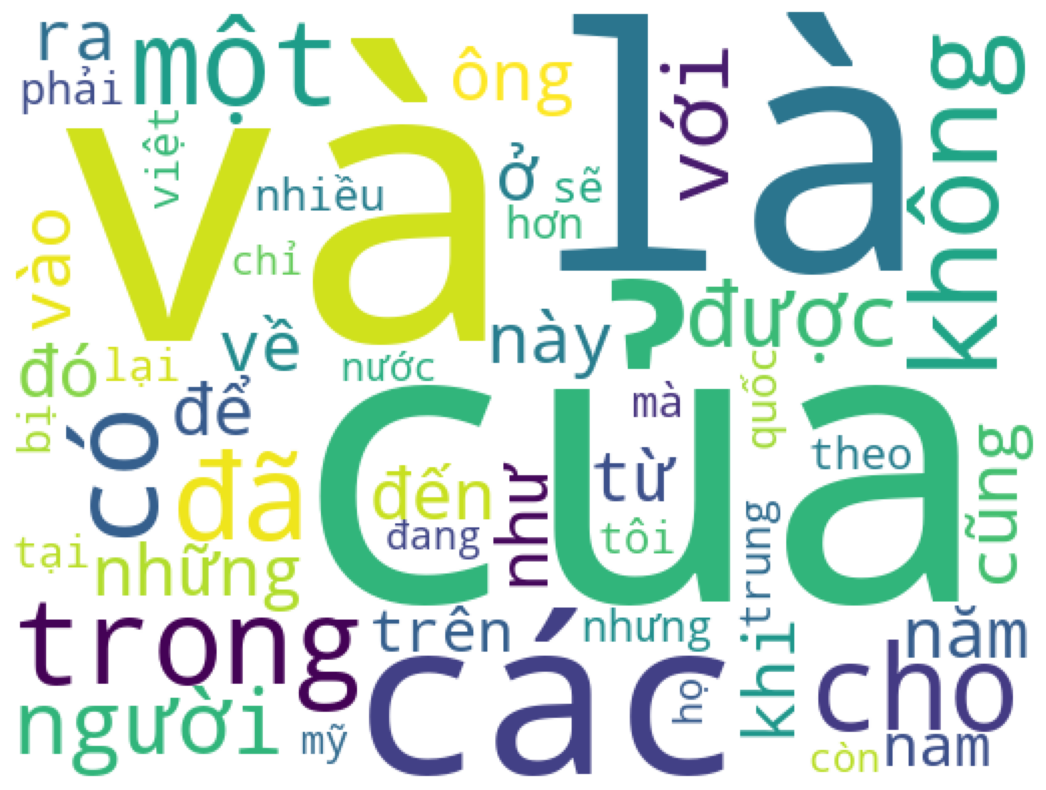

In [16]:
plt.subplots(figsize=(20, 10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                    ).generate(' '.join(top_count['Common_words']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly-World_Cloud.png')
plt.show()

Tiền xử lý có tách từ dừng

In [17]:
df['Compound_VN_Content'] = df['Content'].apply(tokenize_text)

In [18]:
df['preprocess_SW'] = df.apply(lambda row: preprocess(row['Compound_VN_Content'], stopwords), axis=1)

Tokenize

In [19]:
df['Tokenize_Content_SW'] = df['preprocess_SW'].apply(tokenizer)

In [20]:
df.head(5)

,Title,URL,Content,Label,preprocess,Segmented_Content,Tokenize_Content,Word_count,Compound_VN_Content,preprocess_SW,Tokenize_Content_SW
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0,kê tư khi lên câm quyên vao năm tâp cân binh đ...,kê tư khi lên câm quyên vao năm tâp cân binh đ...,"[kê, tư, khi, lên, câm, quyên, vao, năm, tâp, ...",6631,"Kể từ khi lên cầm_quyền vào năm 2013 , Tập_Cận...",cầm_quyền tập_cận_bình đẩy_mạnh hiện_diện trun...,"[cầm_quyền, tập_cận_bình, đẩy_mạnh, hiện_diện,..."
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0,iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,"[iran, chủ_mưu, vụ, tấn_công, vào, mấy, nhà_má...",6271,Iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,iran chủ_mưu vụ tấn_công mấy nhà_máy lọc dầu ả...,"[iran, chủ_mưu, vụ, tấn_công, mấy, nhà_máy, lọ..."
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0,vào ngày tháng để kỷ niệm năm ngày thành lập n...,vào ngày_tháng để kỷ_niệm năm ngày thành_lập n...,"[vào, ngày_tháng, để, kỷ_niệm, năm, ngày, thàn...",4467,"Vào ngày 1 tháng 10 , để kỷ_niệm 70 năm ngày t...",kỷ_niệm thành_lập cộng_hòa nhân_dân trung_hoa ...,"[kỷ_niệm, thành_lập, cộng_hòa, nhân_dân, trung..."
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0,người phát ngôn bộ ngoại giao trung quốc cảnh ...,người phát_ngôn bộ ngoại_giao trung quốc cảnh ...,"[người, phát_ngôn, bộ, ngoại_giao, trung, quốc...",5341,Người_phát_ngôn Bộ Ngoại_giao Trung_Quốc Cảnh_...,người_phát_ngôn ngoại_giao trung_quốc cảnh_sản...,"[người_phát_ngôn, ngoại_giao, trung_quốc, cảnh..."
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0,vào ngày thứ tư tháng năm bộ nội an đã công bố...,vào ngày thứ tư tháng năm bộ nội an đã công_bố...,"[vào, ngày, thứ, tư, tháng, năm, bộ, nội, an, ...",8786,"Vào ngày Thứ_Tư 14 tháng 8 năm 2019 , Bộ Nội_A...",thứ_tư nội_an công_bố quy_tắc quy_tắc trừng_ph...,"[thứ_tư, nội_an, công_bố, quy_tắc, quy_tắc, tr..."


Đếm token


In [21]:
def top_count(dt):
    top = Counter([item for sublist in df[dt].apply(lambda x:str(x).split()) for item in sublist])
    temp = pd.DataFrame(top.most_common(50))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    return temp

In [22]:
word_count_sw = df['preprocess_SW'].apply(count_token)
top_count = top_count("preprocess_SW")
top_count.style.background_gradient(cmap='Blues')

,Common_words,count
0,việt_nam,6363
1,trung_quốc,4321
2,mỹ,3776
3,có_thể,3260
4,hai,3181
5,dân,3150
6,đi,2867
7,đảng,2284
8,đồng,1843
9,tổ_chức,1691


Số token trung bình trong 1 record

Text(0.5, 0, 'Seaborn Strip Plot Quantity Token with stop words')

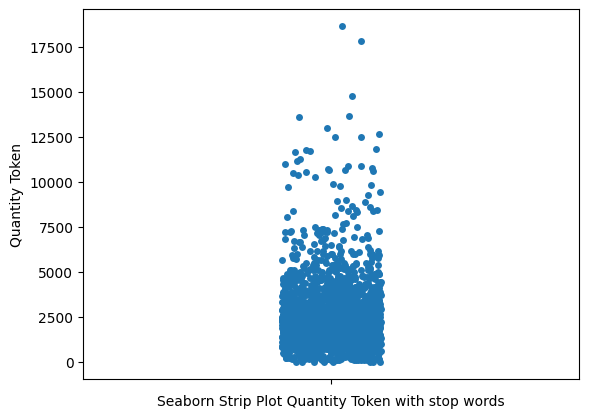

In [23]:
df['Word_count_SW'] = word_count_sw
sns.stripplot(y='Word_count_SW', data = df , jitter=True)

plt.ylabel('Quantity Token')
plt.xlabel('Seaborn Strip Plot Quantity Token with stop words')

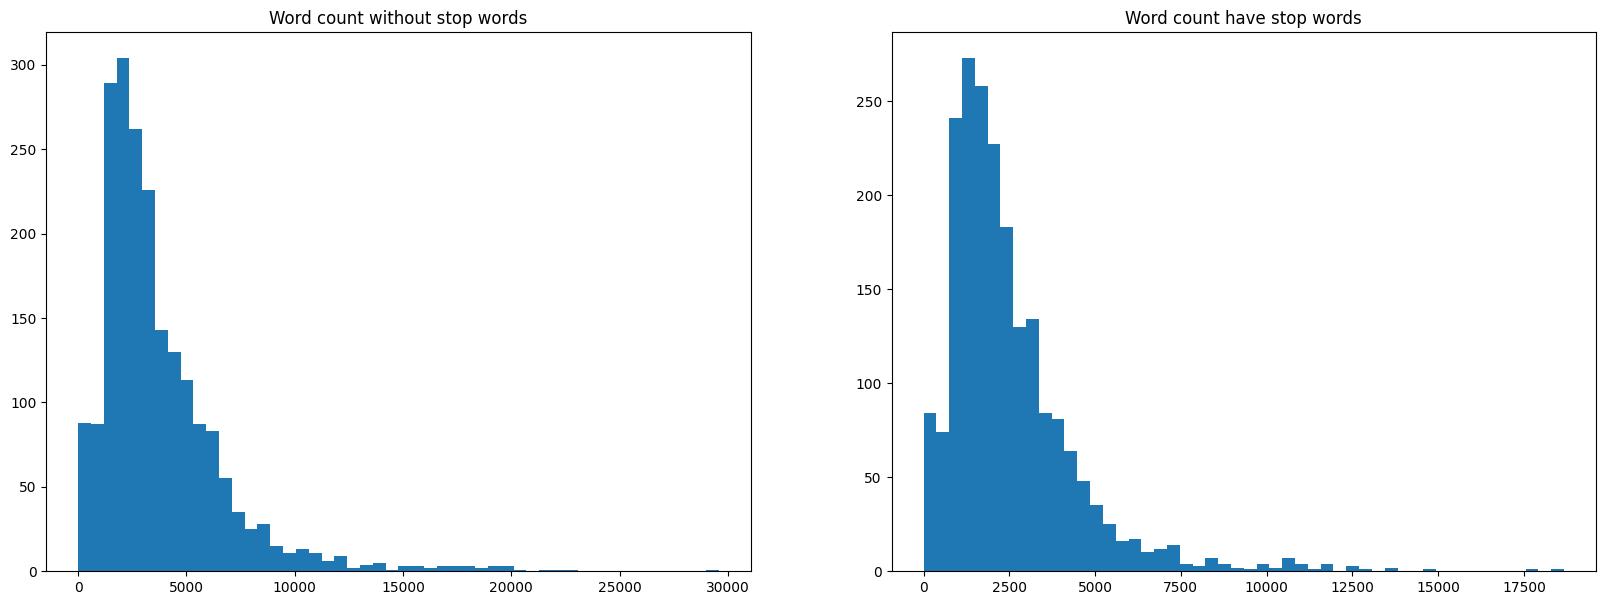

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

# Vẽ histogram cho từng mẫu dữ liệu trên các axes tương ứng

axs[0].hist(df["Word_count"], bins=50)
axs[1].hist(df["Word_count_SW"], bins=50)

axs[0].set_title('Word count without stop words')
axs[1].set_title('Word count have stop words')

# Hiển thị biểu đồ
plt.show()

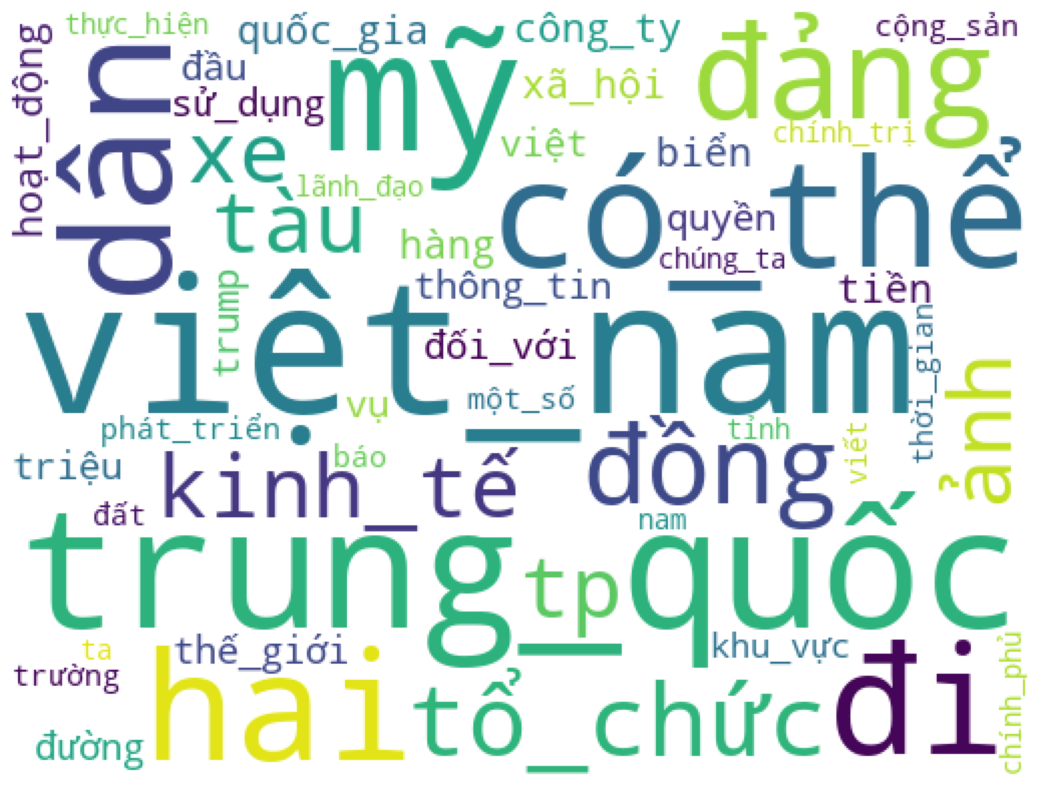

In [25]:
plt.subplots(figsize=(20, 10))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(top_count['Common_words']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.savefig('Plotly_World_Cloud.png')
plt.show()

In [26]:
df.head(5)

,Title,URL,Content,Label,preprocess,Segmented_Content,Tokenize_Content,Word_count,Compound_VN_Content,preprocess_SW,Tokenize_Content_SW,Word_count_SW
0,LÝ DO EXONMOBIL CÓ THỂ RỜI KHỎI VIỆT NAM (Tim ...,https://www.khoi8406.com/post/nhanquyenchovn/l...,"Kể từ khi lên cầm quyền vào năm 2013, Tậ...",1.0,kê tư khi lên câm quyên vao năm tâp cân binh đ...,kê tư khi lên câm quyên vao năm tâp cân binh đ...,"[kê, tư, khi, lên, câm, quyên, vao, năm, tâp, ...",6631,"Kể từ khi lên cầm_quyền vào năm 2013 , Tập_Cận...",cầm_quyền tập_cận_bình đẩy_mạnh hiện_diện trun...,"[cầm_quyền, tập_cận_bình, đẩy_mạnh, hiện_diện,...",4471
1,TỔNG THỐNG TRUMP PHẢI TRẢ ĐŨA IRAN (Ngô Nhân D...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,1.0,iran chủ mưu vụ tấn công vào mấy nhà máy lọc d...,iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,"[iran, chủ_mưu, vụ, tấn_công, vào, mấy, nhà_má...",6271,Iran chủ_mưu vụ tấn_công vào mấy nhà_máy lọc d...,iran chủ_mưu vụ tấn_công mấy nhà_máy lọc dầu ả...,"[iran, chủ_mưu, vụ, tấn_công, mấy, nhà_máy, lọ...",4021
2,ĐẢNG CỘNG SẢN TRUNG QUỐC SẼ SỤP ĐỔ TRƯỚC NĂM 2...,https://www.khoi8406.com/post/nhanquyenchovn/a...,"Vào ngày 1 tháng 10, để kỷ niệm 70 năm ngày th...",1.0,vào ngày tháng để kỷ niệm năm ngày thành lập n...,vào ngày_tháng để kỷ_niệm năm ngày thành_lập n...,"[vào, ngày_tháng, để, kỷ_niệm, năm, ngày, thàn...",4467,"Vào ngày 1 tháng 10 , để kỷ_niệm 70 năm ngày t...",kỷ_niệm thành_lập cộng_hòa nhân_dân trung_hoa ...,"[kỷ_niệm, thành_lập, cộng_hòa, nhân_dân, trung...",3096
3,TRUNG QUỐC SẼ CÓ NHỮNG HÀNH ĐỘNG MẠNH MẼ HƠN Ở...,https://www.khoi8406.com/post/nhanquyenchovn/t...,Người phát ngôn Bộ Ngoại giao Trung Quốc Cảnh ...,1.0,người phát ngôn bộ ngoại giao trung quốc cảnh ...,người phát_ngôn bộ ngoại_giao trung quốc cảnh ...,"[người, phát_ngôn, bộ, ngoại_giao, trung, quốc...",5341,Người_phát_ngôn Bộ Ngoại_giao Trung_Quốc Cảnh_...,người_phát_ngôn ngoại_giao trung_quốc cảnh_sản...,"[người_phát_ngôn, ngoại_giao, trung_quốc, cảnh...",3567
4,PIVOT LÊN ÁN QUY TẮC MỚI VỀ PUBLIC CHARGE - CÔ...,https://www.khoi8406.com/post/nhanquyenchovn/p...,"Vào ngày Thứ Tư 14 tháng 8 năm 2019, Bộ Nội An...",1.0,vào ngày thứ tư tháng năm bộ nội an đã công bố...,vào ngày thứ tư tháng năm bộ nội an đã công_bố...,"[vào, ngày, thứ, tư, tháng, năm, bộ, nội, an, ...",8786,"Vào ngày Thứ_Tư 14 tháng 8 năm 2019 , Bộ Nội_A...",thứ_tư nội_an công_bố quy_tắc quy_tắc trừng_ph...,"[thứ_tư, nội_an, công_bố, quy_tắc, quy_tắc, tr...",5300


In [27]:
df.to_csv('preprocess1k.csv',index = False, encoding='utf-8-sig')